In [1]:
import matplotlib.colors as pltcolors
import matplotlib.pyplot as plt
import numpy as np

from main import Kernel, SVM

In [2]:
def plot_line(ax, xRange, w, x0, label, color='grey', linestyle='-', alpha=1.):
    """ Plot a (separating) line given the normal vector (weights) and point of intercept """
    if type(x0) == int or type(x0) == float or type(x0) == np.float64:
        x0 = [0, -x0 / w[1]]
    yy = -(w[0] / w[1]) * (xRange - x0[0]) + x0[1]
    ax.plot(xRange, yy, color=color, label=label, linestyle=linestyle)


def plot_svm(X, y, support=None, w=None, intercept=0., label='Data', separatorLabel='Separator',
             ax=None, bound=[[-1., 1.], [-1., 1.]]):
    """ Plot the SVM separation, and margin """
    if ax is None:
        fig, ax = plt.subplots(1)

    im = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=0.5, label=label)
    if support is not None:
        ax.scatter(support[:, 0], support[:, 1], label='Support', s=80, facecolors='none',
                   edgecolors='y', color='y')
        print("Number of support vectors = %d" % (len(support)))
    if w is not None:
        xx = np.array(bound[0])
        plot_line(ax, xx, w, intercept, separatorLabel)
        # Plot margin
        if support is not None:
            signedDist = np.matmul(support, w)
            margin = np.max(signedDist) - np.min(signedDist) * np.sqrt(np.dot(w, w))
            supportMaxNeg = support[np.argmin(signedDist)]
            plot_line(ax, xx, w, supportMaxNeg, 'Margin -', linestyle='-.', alpha=0.8)
            supportMaxPos = support[np.argmax(signedDist)]
            plot_line(ax, xx, w, supportMaxPos, 'Margin +', linestyle='--', alpha=0.8)
            ax.set_title('Margin = %.3f' % (margin))

    ax.legend(loc='upper left')
    ax.grid()
    ax.set_xlim(bound[0])
    ax.set_ylim(bound[1])
    cb = plt.colorbar(im, ax=ax)
    loc = np.arange(-1, 1, 1)
    cb.set_ticks(loc)
    cb.set_ticklabels(['-1', '1'])


# Линейное ядро

In [3]:
def generate_batch_bipolar(n, mu=0.5, sigma=0.2):
    X = np.random.normal(mu, sigma, (n, 2))
    yB = np.random.uniform(0, 1, n) > 0.5
    # y is in {-1, 1}
    y = 2. * yB - 1
    X *= y[:, np.newaxis]
    X -= X.mean(axis=0)
    return X, y

Number of support vectors = 6


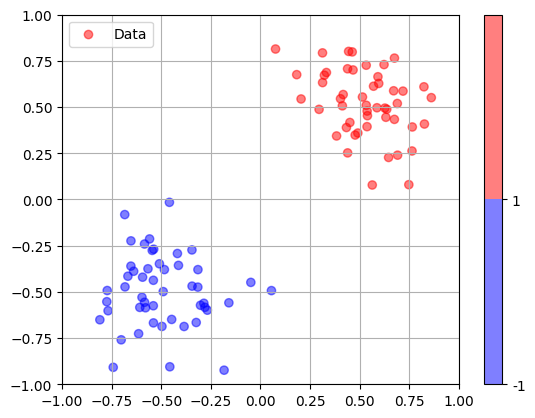

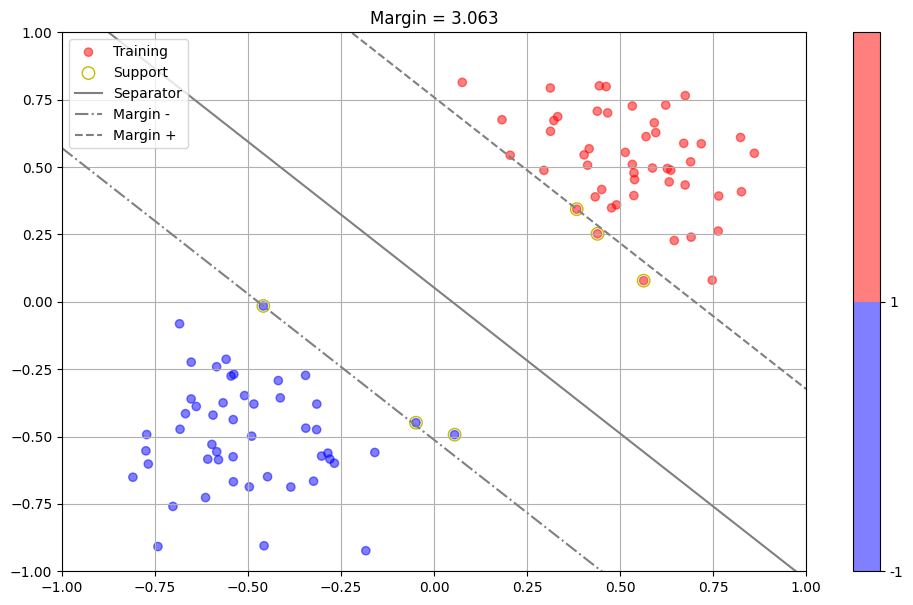

In [4]:
colors = ['blue', 'red']
cmap = pltcolors.ListedColormap(colors)
nFeatures = 2
N = 100

xTrain0, yTrain0 = generate_batch_bipolar(N, sigma=0.2)
plot_svm(xTrain0, yTrain0)

clf = SVM(C=1.0, kernel=Kernel.linear)
clf.fit(xTrain0, yTrain0)
fig, ax = plt.subplots(1, figsize=(12, 7))
plot_svm(xTrain0, yTrain0, clf.support_vectors, clf.w, clf.intercept, label='Training', ax=ax)

# RBF

In [5]:
def generate_batch_xor(n, mu=0.5, sigma=0.5):
    """ Four gaussian clouds in a Xor fashion """
    X = np.random.normal(mu, sigma, (n, 2))
    yB0 = np.random.uniform(0, 1, n) > 0.5
    yB1 = np.random.uniform(0, 1, n) > 0.5
    # y is in {-1, 1}
    y0 = 2. * yB0 - 1
    y1 = 2. * yB1 - 1
    X[:, 0] *= y0
    X[:, 1] *= y1
    X -= X.mean(axis=0)
    return X, y0 * y1

Number of support vectors = 38


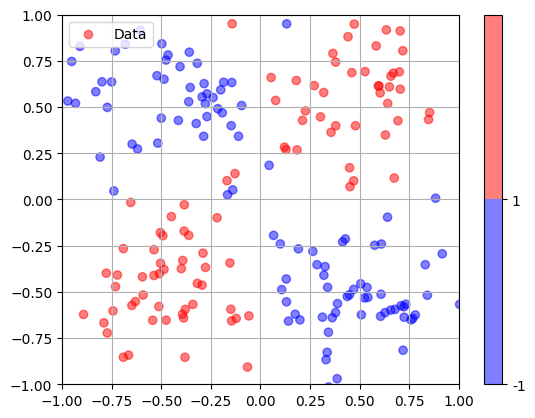

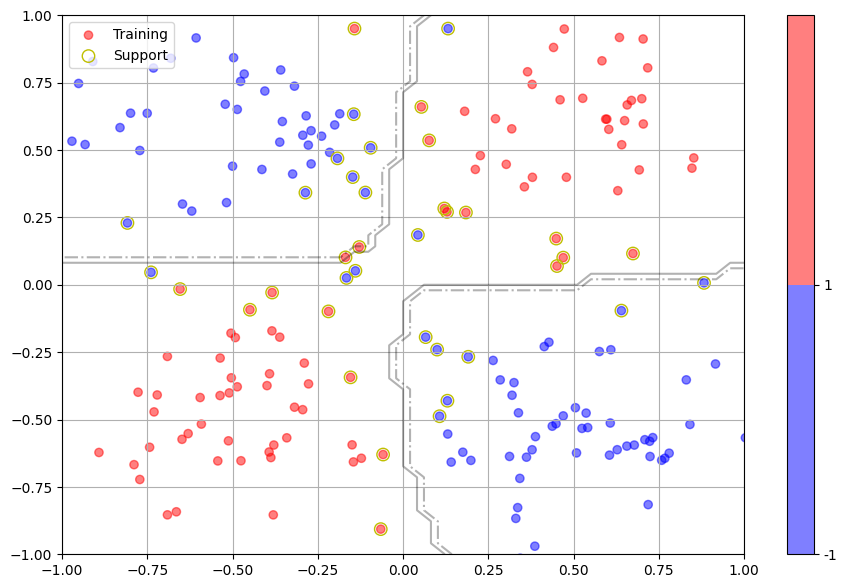

In [6]:
xTrain3, yTrain3 = generate_batch_xor(2 * N, sigma=0.25)
plot_svm(xTrain3, yTrain3)
xTest3, yTest3 = generate_batch_xor(2 * N, sigma=0.25)

model30 = SVM(C=5, kernel=Kernel.rbf)
model30.fit(xTrain3, yTrain3)

fig, ax = plt.subplots(1, figsize=(11, 7))
plot_svm(xTrain3, yTrain3, support=model30.support_vectors, label='Training', ax=ax)

# Estimate and plot decision boundary
xx = np.linspace(-1, 1, 50)
X0, X1 = np.meshgrid(xx, xx)
xy = np.vstack([X0.ravel(), X1.ravel()]).T
Y30 = model30.predict(xy).reshape(X0.shape)
ax.contour(X0, X1, Y30, colors='k', levels=[-1, 0], alpha=0.3, linestyles=['-.', '-']);

Number of support vectors = 44


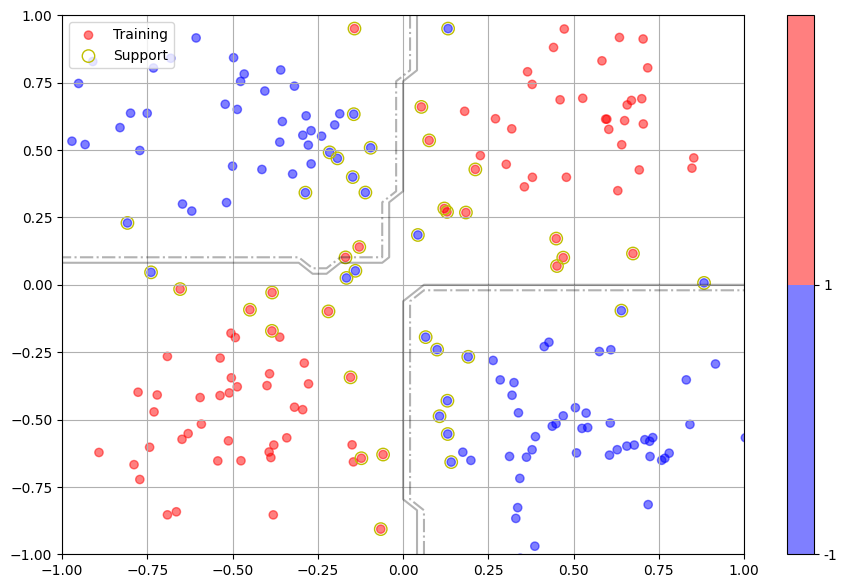

In [9]:
from sklearn import svm

model30 = svm.SVC(kernel='rbf', C=10, gamma=1/2, shrinking=False)
model30.fit(xTrain3, yTrain3)

fig, ax = plt.subplots(1, figsize=(11, 7))
plot_svm(xTrain3, yTrain3, support=model30.support_vectors_, label='Training', ax=ax)

# Estimate and plot decision boundary
xx = np.linspace(-1, 1, 50)
X0, X1 = np.meshgrid(xx, xx)
xy = np.vstack([X0.ravel(), X1.ravel()]).T
Y30 = model30.predict(xy).reshape(X0.shape)
ax.contour(X0, X1, Y30, colors='k', levels=[-1, 0], alpha=0.3, linestyles=['-.', '-']);

# Полиномиальный

Number of support vectors = 32


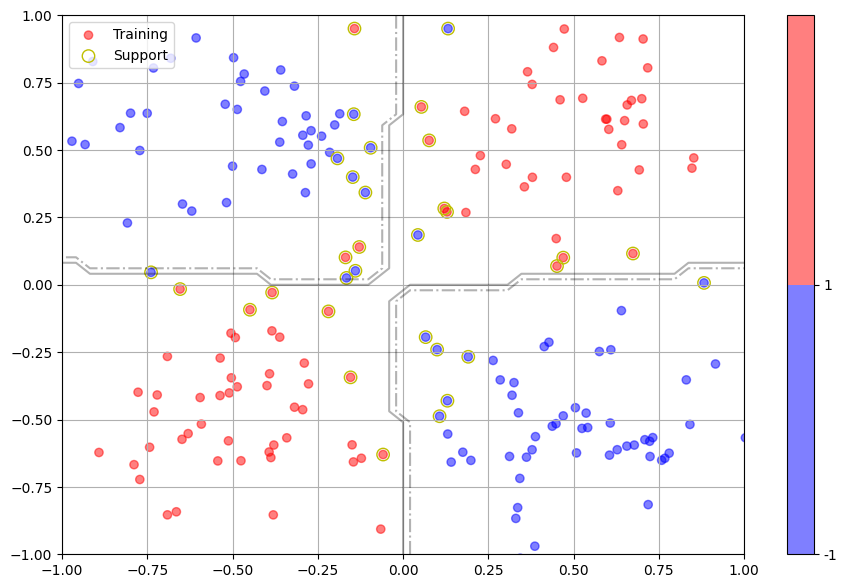

In [7]:
model30 = SVM(C=5, kernel=Kernel.poly)
model30.fit(xTrain3, yTrain3)

fig, ax = plt.subplots(1, figsize=(11, 7))
plot_svm(xTrain3, yTrain3, support=model30.support_vectors, label='Training', ax=ax)

# Estimate and plot decision boundary
xx = np.linspace(-1, 1, 50)
X0, X1 = np.meshgrid(xx, xx)
xy = np.vstack([X0.ravel(), X1.ravel()]).T
Y30 = model30.predict(xy).reshape(X0.shape)
ax.contour(X0, X1, Y30, colors='k', levels=[-1, 0], alpha=0.3, linestyles=['-.', '-']);